In [39]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

# Hierarchical Clustering

Hierarchical clustering is another common approach to unsupervised learning. There are two main types of hierarchical clustering: agglomerative and divisive. Agglomerative clustering is a bottom-up approach and divisive clustering is the opposite of agglomerative clustering, a top-down approach. As agglomerative hierarchical clustering is the most commonly used, we will focus on it in this section.

As we mentioned in the previous section, hierarchical clustering does not require us to decide on the number of clusters we want before clustering the data. In addition, it provides the user with a tree-based representation of the relationships between observations called a **dendrogram**. This is especially useful for data with a hierarchical or nested structure (eg cities within states/provinces within countries or players within teams within leagues).

## What are Dendrograms?

A dendrogram is a tree-diagram representing similarity between datapoints. It is called a tree-diagram because it looks similar to an upside-down tree with the trunk at the top and branches leading to leaves at the bottom. An example of a dendrogram produced by hierarchical clustering is depicted below.


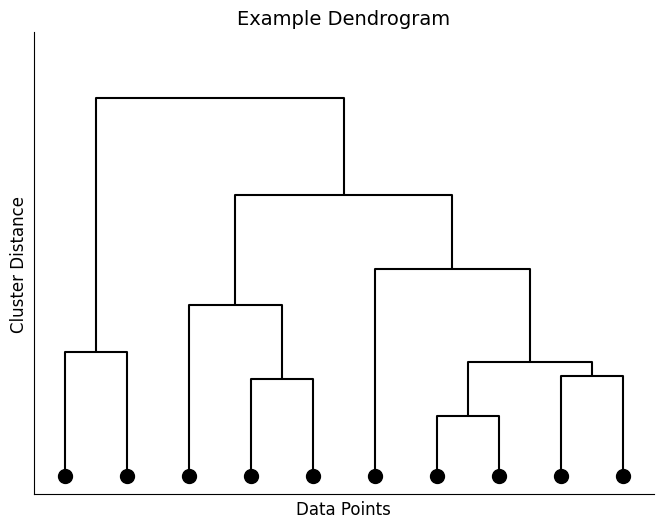

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(312)
X = np.random.rand(10, 2)

Z = linkage(X, method='ward')

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode=None, no_labels=True, color_threshold=0, above_threshold_color='k')

plt.plot(np.arange(1,11)*10-5, np.zeros(10), 'ko', markersize=10)

plt.xticks([])
plt.yticks([])
plt.ylim(-0.05, 1.2)

plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Cluster Distance', fontsize=12)
plt.title('Example Dendrogram', fontsize=14)
plt.show()

At the bottom of the image are the individual observations in the dataset. These points are gradually linked by branches as we move up the tree until all points are connected at the top. The lower in the tree points are connected, the more similar those points are to each other as deemed by the algorithm. Points that are fused together higher in the dendrogram are less similar to each other. That is, the height on the vertical axis at which points become connected indicates how similar/different the two observations are from each other.

```{note}
We can only draw conclusions about the similarity between points based on their proximity on the vertical axis *not the horizontal axis*. Two points being next to each other along the horizontal axis means nothing about their similarity/dissimilarity.
```

To decide how many clusters we split the data into, we choose a height at which to 'cut' the dendrogram. This height is essentially a threshold at which we decide points are far enough away from each other that they shouldn't belong in the same cluster. Imagine you are cutting through the dendrogram at a certain height; each piece of the tree that falls is a separate cluster. Let's show an example. Below, I have the same dendrogram as above but I have drawn a line across it at some height t.

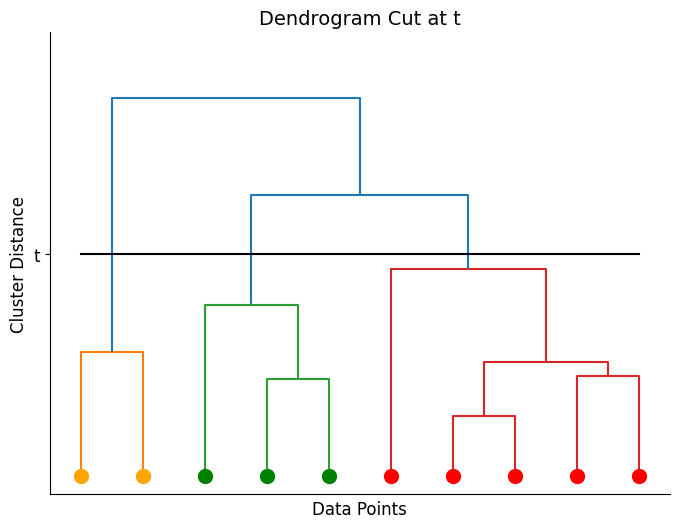

In [41]:
np.random.seed(312)
X = np.random.rand(10, 2)

Z = linkage(X, method='ward')

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode=None, no_labels=True, color_threshold=0.6)

# Plot scatter points
plt.plot(np.arange(1,3)*10-5, np.zeros(2), 'o', markersize=10, color='orange')
plt.plot(np.arange(3,6)*10-5, np.zeros(3), 'o', markersize=10, color='green')
plt.plot(np.arange(6,11)*10-5, np.zeros(5), 'o', markersize=10, color='red')

plt.plot(np.arange(1,11)*10-5, np.repeat(0.6,10),'k-')

plt.xticks([])
plt.yticks(ticks=[0.6],labels=['t'],fontsize=12)
plt.ylim(-0.05, 1.2)

plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Cluster Distance', fontsize=12)

plt.title('Dendrogram Cut at t', fontsize=14)

plt.show()

This cut splits the dendrogram (and thus the dataset) into 3 clusters, shown in the image as orange, green, and red. Notice that, depending on where we draw our line, we could cut the dendrogram into any number of clusters. The image below shows a different cut at height t' which results in only 2 clusters.


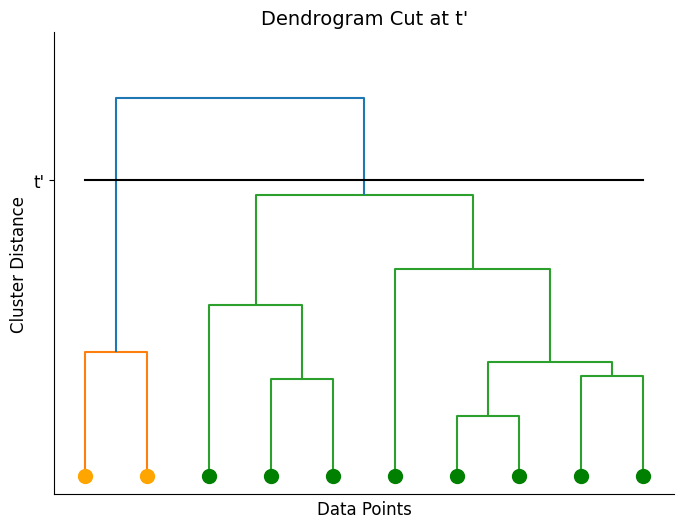

In [42]:
np.random.seed(312)
X = np.random.rand(10, 2)

Z = linkage(X, method='ward')

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode=None, no_labels=True, color_threshold=0.8)

# Plot scatter points
plt.plot(np.arange(1,3)*10-5, np.zeros(2), 'o', markersize=10, color='orange')
plt.plot(np.arange(3,11)*10-5, np.zeros(8), 'o', markersize=10, color='green')

plt.plot(np.arange(1,11)*10-5, np.repeat(0.8,10),'k-')

plt.xticks([])
plt.yticks(ticks=[0.8],labels=['t\''],fontsize=12)
plt.ylim(-0.05, 1.2)

plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Cluster Distance', fontsize=12)

plt.title('Dendrogram Cut at t\'', fontsize=14)

plt.show()

In practice, people often look at the dendrogram and select the number of clusters by eye, based on the fusion heights and domain knowledge.

## The Algorithm

Now that we understand the output of a hierarchical clustering, let's walk through the algorithm depicted in {prf:ref}`hierarchical`.

```{prf:algorithm} Hierarchical Clustering
:label: hierarchical

**Inputs** Given a dissimilarity metric and linkage.

**Output** A dendrogram that can be used to decide on a clustering of $n$ datapoints.

1. Begin by treating each of the $n$ points as its own cluster.
2. While there exists more than one cluster:
    - Fuse the two clusters that are closest given the choice of dissimilarity metric and linkage.

```

We start by treating every observation in our dataset as if it is its own, tiny cluster. Then, we measure the distance between each pair of 'clusters' and fuse the two closest clusters together into one larger cluster. Now, we have moved from having $n$ distinct clusters to having $n-1$ clusters. One of these clusters contains 2 points, the rest contain only 1. Next, we calculate the distance between each pair of these $n-1$ clusters and, again, fuse the two closest together. We continue this way until all points belong to one large cluster.

If you look back to our example dendrograms, you can imagine how this algorithm draws the dendrogram from the bottom up, fusing points together until all points have been connected.

### Dissimilarity vs Linkage

You may have noticed we glossed over two important, and commonly confused, terms in {prf:ref}`hierarchical`: **dissimilarity** and **linkage**. 

Dissimilarity is another term for distance metric. We've talked about distance metrics in the [previous section](../1/kmeans.ipynb#the-algorithm-in-code) and in more detail in [Chapter 21](../../21/3/Features_to_Consider). There are many different ways to measure distance between points and, like in previous chapters, we can use cross-validation to choose a distance metric for our application. Imagine you are trying to calculate Euclidean distance, for example, between two points. As Euclidean distance is the shortest path from one point to the other, it is akin to drawing a straight line between points and measuring that line. We have a formula that we can use to calculate this distance. However, in {prf:ref}`hierarchical`, we are not always calculating distances between pairs of points. Sometimes, we need to calculate distances between a point and a group of points or between two groups of points. How would we draw a line between two clusters of points? Should we connect the points in each cluster that are closest to each other? Connect the centroids of the two groups? This choice of how to determine distance between clusters is known as **linkage**.

Some choices for linkage include:
- **Complete Linkage** - calculate distance between the furthest pair of points (shown below left)
- **Average Linkage** - calculate the distance between all pairs of points and take the average (not pictured as it is an average of all pairwise distances)
- **Centroid Linkage** - calculate the distance between the two centroids (shown below center)
- **Single Linkage** - calculate distance between the closest pair of points (shown below right)

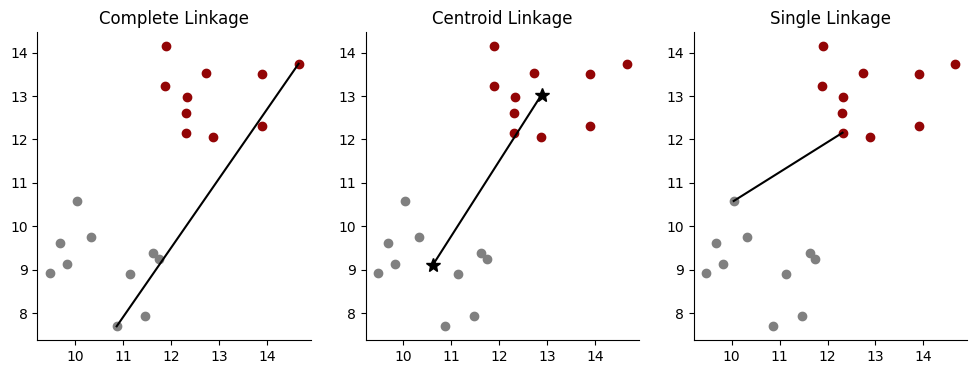

In [43]:
from sklearn.datasets import make_blobs 
import itertools

fig, axs = plt.subplots(1, 3, figsize=(12, 4));

X, y = make_blobs(n_samples=[10,10], cluster_std=[1,1], centers=[(10,10),(13,13)], n_features=2, random_state=1)

def sqdist(pts):
    p1 = pts[0]
    p2 = pts[1]
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

point_pairs = list(itertools.product(X[y == 0], X[y == 1]))

closestCoord1, closestCoord2 = min(point_pairs, key=sqdist)
farCoord1, farCoord2 = max(point_pairs, key=sqdist)

axs[0].plot(X[y == 0, 0], X[y == 0, 1], "o",color="grey");
axs[0].plot(X[y == 1, 0], X[y == 1, 1], "o",color="#930506");
axs[0].plot([farCoord1[0],farCoord2[0]],[farCoord1[1],farCoord2[1]], "-",color="black");
axs[0].set_title('Complete Linkage');

axs[1].plot(X[y == 0, 0], X[y == 0, 1], "o",color="grey");
axs[1].plot(X[y == 1, 0], X[y == 1, 1], "o",color="#930506");
axs[1].plot(X[y == 0, 0].mean(),X[y == 0, 1].mean(), "*",color="black",markersize=10);
axs[1].plot(X[y == 1, 0].mean(),X[y == 1, 1].mean(), "*",color="black",markersize=10);
axs[1].plot([X[y == 0, 0].mean(),X[y == 1, 0].mean()],[X[y == 0, 1].mean(),X[y == 1, 1].mean()], "-",color="black");
axs[1].set_title('Centroid Linkage');

axs[2].plot(X[y == 0, 0], X[y == 0, 1], "o",color="grey");
axs[2].plot(X[y == 1, 0], X[y == 1, 1], "o",color="#930506");
axs[2].plot([closestCoord1[0],closestCoord2[0]],[closestCoord1[1],closestCoord2[1]], "-",color="black");
axs[2].set_title('Single Linkage');


Complete and average linkage are commonly used because they lead to balanced dendrograms (ie no majority clusters). The example dendrogram from earlier would be considered a balanced dendrogram. Single linkage can result in "trailing clusters" where observations tend to be fused one-at-a-time. An example of a dendrogram with trailing clusters is shown below.

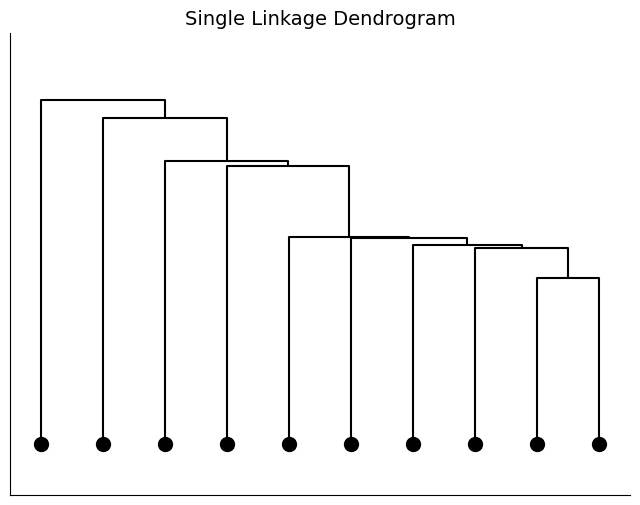

In [44]:
np.random.seed(312)
X = np.random.rand(10, 2)

Z = linkage(X, method='single')

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode=None, no_labels=True, color_threshold=0, above_threshold_color='k')

# Plot scatter points
plt.plot(np.arange(1,11)*10-5, np.zeros(10), 'o', markersize=10, color='k')

plt.xticks([])
plt.yticks([])
plt.ylim(-0.05, 0.4)

plt.title('Single Linkage Dendrogram', fontsize=14)

plt.show()

Centroid linkage can result in a dendrogram where clusters are fused at heights below either of the individual cluster heights. This is called inversion and can be hard to visualize or interpret. An example of a dendrogram with an inversion is shown below with the inverted portion circled in red.

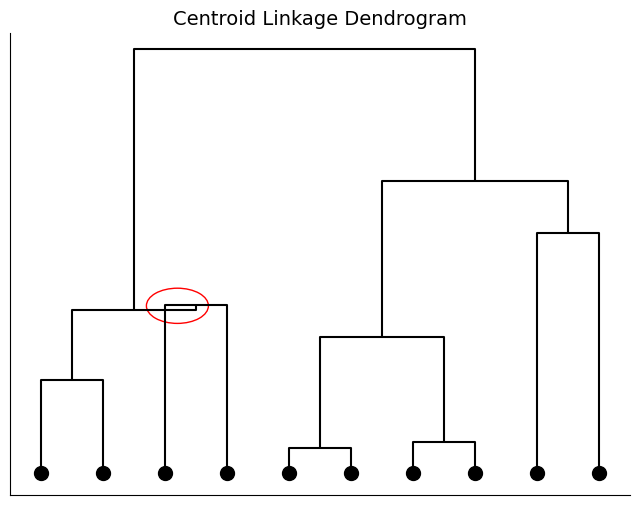

In [45]:
from matplotlib.patches import Ellipse

np.random.seed(1)
X = np.random.rand(10, 2)

Z = linkage(X, method='centroid')

plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode=None, p=3, no_labels=True, color_threshold=0, above_threshold_color='k')

plt.plot(np.arange(1,11)*10-5, np.zeros(10), 'o', markersize=10,color="k")

plt.xticks([])
plt.yticks([])
plt.ylim(-0.025, 0.5)

plt.title('Centroid Linkage Dendrogram', fontsize=14)
fig = plt.gcf()
ax = fig.gca()
circle1 = Ellipse(xy=(27, 0.19), height=0.04, width=10, color='r', fill=False)
ax.add_patch(circle1)

plt.show()

Note, the dendrogram with trailing clusters was created using the same data as the example dendrogram from earlier. The only change to the clustering algorithm was the choice of linkage. The linkage chosen in hierarchical clustering, like the choice of distance metric, can have very large effects on our final dendrogram. These choices are often based on the application and are made using a combination of cross-validation and domain knowledge.

## A 2D Example

show dendrogram alongside scatter plot

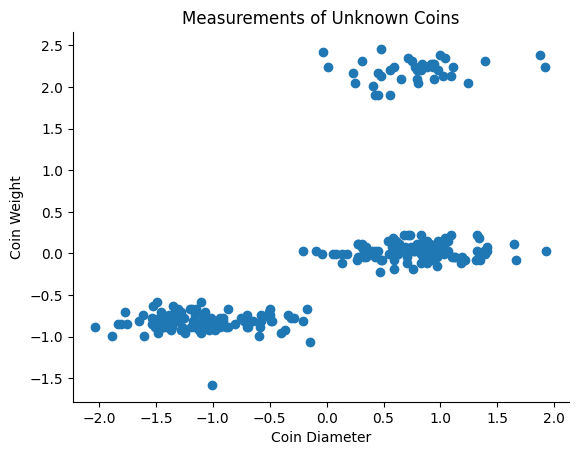

In [102]:
coins = pd.read_csv("../../data/coins.csv")
def standard_units(my_data):
    '''Takes in an array of data and returns that data standardized by subtracting the mean 
    and dividing by the standard deviation'''

    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof = 1)
    standardized_data = (my_data - my_mean) / my_stddev
    
    return standardized_data

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

plt.scatter(coins_su['diameter'],coins_su['weight'])
plt.xlabel('Coin Diameter')
plt.ylabel('Coin Weight')
plt.title('Measurements of Unknown Coins');

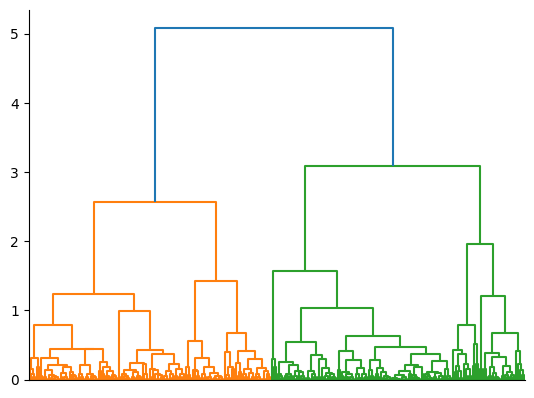

<Figure size 800x600 with 0 Axes>

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(coins_su, method='complete')
my_tree = dendrogram(Z, no_labels=True)

plt.figure(figsize=(8, 6))
my_tree
plt.show();


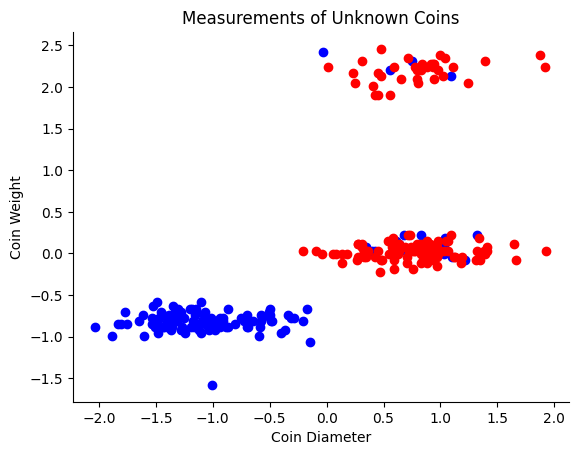

In [72]:
coins_clust1 = coins_su[np.array(my_tree['leaves_color_list']) == 'C1']
coins_clust2 = coins_su[np.array(my_tree['leaves_color_list']) == 'C2']
coins_clust3 = coins_su[np.array(my_tree['leaves_color_list']) == 'C3']

plt.scatter(coins_clust1['diameter'],coins_clust1['weight'],color="blue")
plt.scatter(coins_clust2['diameter'],coins_clust2['weight'],color="red")
plt.scatter(coins_clust3['diameter'],coins_clust3['weight'],color="green")
plt.xlabel('Coin Diameter')
plt.ylabel('Coin Weight')
plt.title('Measurements of Unknown Coins');

In [64]:
print(Z)

[[7.00000000e+00 7.00000000e+01 1.10827884e-03 2.00000000e+00]
 [1.19000000e+02 1.82000000e+02 1.73199942e-03 2.00000000e+00]
 [1.93000000e+02 1.99000000e+02 2.66859921e-03 2.00000000e+00]
 ...
 [4.90000000e+02 5.36000000e+02 1.18139235e+00 4.00000000e+01]
 [5.37000000e+02 5.39000000e+02 2.03987958e+00 2.32000000e+02]
 [5.40000000e+02 5.41000000e+02 2.73480070e+00 2.72000000e+02]]


Update function called with num=0
Step: 1
Merging clusters: 7 and 70 into new cluster 272
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92],

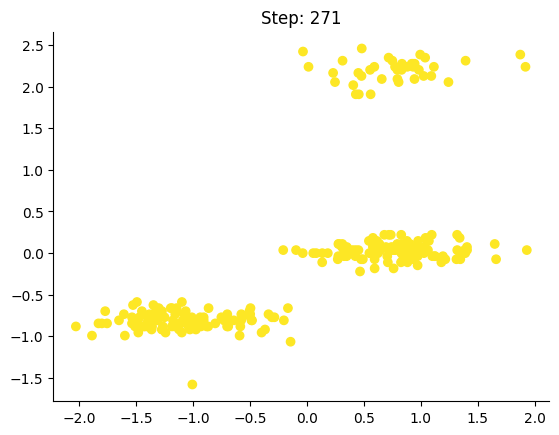

In [107]:
import matplotlib.animation as animation
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib.colors import ListedColormap

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
max_cluster_id = len(coins_su)

# Define a discrete colormap
n_clusters = len(coins_su)  # At most, we start with every point as its own cluster
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, n_clusters)))

# Set up the figure and axis
fig, ax = plt.subplots()

# Initial scatter plot with all points in black
scatter = ax.scatter(coins_su["diameter"], coins_su["weight"], c='black')

# Initialization function for FuncAnimation
def init():
    scatter.set_offsets(coins_su)
    scatter.set_array(np.zeros(len(coins_su)))
    return scatter,

# Function to update the plot
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, _, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su))
    for cluster_id, points in clusters.items():
        colors[points] = cluster_id

    # Clear previous plot and create new scatter plot
    ax.clear()
    scatter = ax.scatter(coins_su["diameter"], coins_su["weight"], c=colors, cmap=cmap, vmin=0, vmax=n_clusters-1)
    ax.set_title(f'Step: {num + 1}')
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z), init_func=init, repeat=True, blit=True)

# Save the animation
ani.save('agglomerative_clustering.mp4', writer='ffmpeg', fps=1)

# Show the plot
plt.show()

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 272.

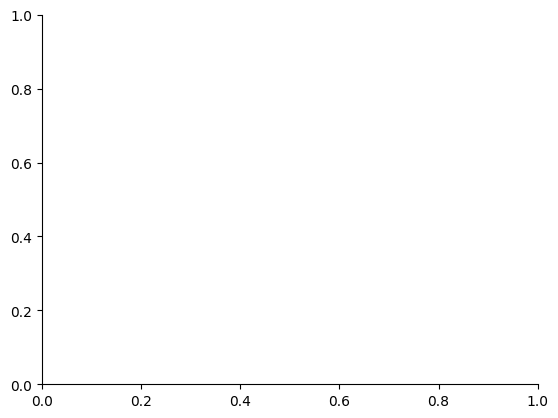

In [96]:
plt.scatter(coins_su["diameter"], coins_su["weight"], c=0)


Update function called with num=0
Step: 1
Merging clusters: 7 and 70 into new cluster 272
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92],

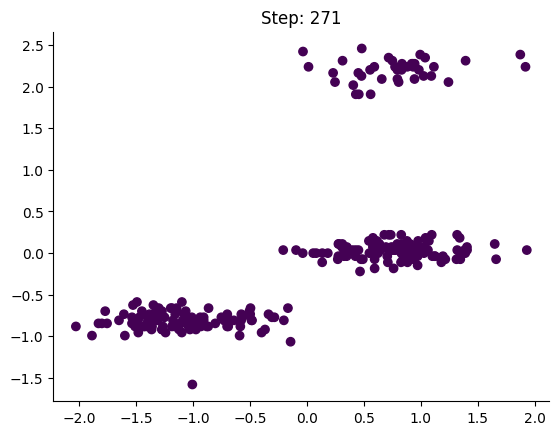

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.cluster.hierarchy import linkage

# Initialize clusters with each point in its own cluster
clusters = {i: [i] for i in range(len(coins_su))}
max_cluster_id = len(coins_su)

# Set up the figure and axis
fig, ax = plt.subplots()

# Initialization function for FuncAnimation
def init():
    ax.clear()
    scatter = ax.scatter(coins_su['diameter'], coins_su['weight'], c='black')
    ax.set_title('Step: 1')
    return scatter,

# Function to update the plot
def update(num):
    print(f"Update function called with num={num}")

    # Get the clusters being merged in this step
    cluster1, cluster2, _, _ = Z[num]
    cluster1, cluster2 = int(cluster1), int(cluster2)

    # Merge clusters
    new_cluster = clusters[cluster1] + clusters[cluster2]
    del clusters[cluster1], clusters[cluster2]
    clusters[max_cluster_id + num] = new_cluster

    # Debugging print statements
    print(f"Step: {num + 1}")
    print(f"Merging clusters: {cluster1} and {cluster2} into new cluster {max_cluster_id + num}")
    print(f"Current clusters: {clusters}")

    # Assign colors to points based on cluster membership
    colors = np.zeros(len(coins_su))
    for cluster_id, points in clusters.items():
        colors[points] = cluster_id

    # Clear previous plot and create new scatter plot
    ax.clear()
    scatter = ax.scatter(coins_su["diameter"], coins_su['weight'], c=colors, cmap='viridis')
    ax.set_title(f'Step: {num + 1}')
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(Z), init_func=init, repeat=False, blit=False)

# Save the animation
ani.save('agglomerative_clustering.mp4', writer='ffmpeg', fps=1)

# Show the plot
plt.show()
